<h3> 초기값 설정 </h3>

In [14]:
x_data = [1,2,3,4,5]
y_data = [-1,5,2,3,9]

epoch = 100
learning_rate = 0.00005

<h3> 미분을 위한 sympy import 및 함수 설정 </h3>

In [15]:
from sympy import symbols, Derivative
a0,a1,a2,a3,x= symbols('a0,a1,a2,a3,x')
fx = a0+a1*x+a2*(x**2)+a3*(x**3)
MeanSquareError = 0

for i in range(len(x_data)) :
    MeanSquareError += (y_data[i]-fx.subs({x:x_data[i]}))**2

MeanSquareError_a0 = Derivative(MeanSquareError, a0).doit()
MeanSquareError_a1 = Derivative(MeanSquareError, a1).doit()
MeanSquareError_a2 = Derivative(MeanSquareError, a2).doit()
MeanSquareError_a3 = Derivative(MeanSquareError, a3).doit()

print(MeanSquareError)
print(MeanSquareError_a0)
print(MeanSquareError_a1)
print(MeanSquareError_a2)
print(MeanSquareError_a3)

(-a0 - 5*a1 - 25*a2 - 125*a3 + 9)**2 + (-a0 - 4*a1 - 16*a2 - 64*a3 + 3)**2 + (-a0 - 3*a1 - 9*a2 - 27*a3 + 2)**2 + (-a0 - 2*a1 - 4*a2 - 8*a3 + 5)**2 + (-a0 - a1 - a2 - a3 - 1)**2
10*a0 + 30*a1 + 110*a2 + 450*a3 - 36
30*a0 + 110*a1 + 450*a2 + 1958*a3 - 144
110*a0 + 450*a1 + 1958*a2 + 8850*a3 - 620
450*a0 + 1958*a1 + 8850*a2 + 41030*a3 - 2820


<h3> 학습 </h3>

In [16]:
a0_ = -1
a1_ = -1
a2_ = -1
a3_ = -1
data = []

for i in range(epoch):
    a0_,a1_,a2_,a3_ = a0_ - learning_rate* (MeanSquareError_a0.subs({a0:a0_,a1:a1_,a2:a2_,a3:a3_})),a1_ - learning_rate* (MeanSquareError_a1.subs({a0:a0_,a1:a1_,a2:a2_,a3:a3_})),a2_ - learning_rate* (MeanSquareError_a2.subs({a0:a0_,a1:a1_,a2:a2_,a3:a3_})),a3_ - learning_rate* (MeanSquareError_a3.subs({a0:a0_,a1:a1_,a2:a2_,a3:a3_}))
    data.append([a0_,a1_,a2_,a3_,MeanSquareError.subs({a0:a0_,a1:a1_,a2:a2_,a3:a3_})])
    
    print("="*40)
    print(MeanSquareError.subs({a0:a0_,a1:a1_,a2:a2_,a3:a3_}))
    print("="*40)
    print()

49257.2400101600

65335.7525699672

86673.9889527614

114992.491233079

152574.619447536

202450.658719439

268642.150888693

356486.151085261

473065.554025709

627780.187205033

833104.718178533

1105594.48593253

1467220.35644059

1947140.23169351

2584050.04882359

3429303.83017950

4551054.35372040

6039748.30562586

8015418.98880264

10637364.5977462

14116992.4182241

18734864.5784939

24863319.7495063

32996494.7798291

43790166.9071266

58114629.0202696

77124861.2998991

102353657.170769

135835212.303373

180269141.635400

239238149.091299

317496900.690685

421355392.859384

559187726.896975

742107312.042261

984862938.701608

1307027972.14723

1734578551.27080

2301988042.42166

3055006623.96209

4054350119.20241

5380595507.99742

7140677841.68189

9476512407.03591

12576437343.6170

16690399331.7072

22150106771.5854

29395775403.2294

39011622863.4598

51772974103.6043

68708775773.4478

91184560100.8508

121012547637.498

160597766445.667

213131969303.438

2828509844

4.27038458870420e+15

5.66729847699782e+15

7.52116615265507e+15

9.98146480645756e+15

1.32465681066467e+16

1.75797410506829e+16

2.33303669992831e+16

3.09621184266587e+16

4.10903427921171e+16

5.45316779526284e+16

7.23698976027929e+16



In [17]:
data_min = data[[i[-1] for i in data].index(min([i[-1] for i in data]))]
print(data_min)

[-0.968200000000000, -0.865400000000000, -0.400600000000000, 1.75540000000000, 49257.2400101600]


<h3> MeanSquareError 그래프 </h3>

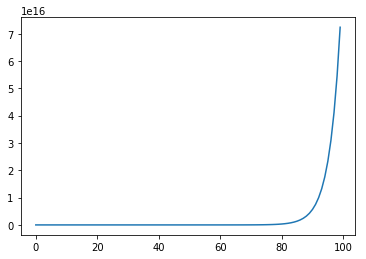

In [18]:
import matplotlib.pyplot as plt
plt.plot(range(len(data)),[i[-1] for i in data])
plt.show()

<h3> 최적선 그래프 </h3>

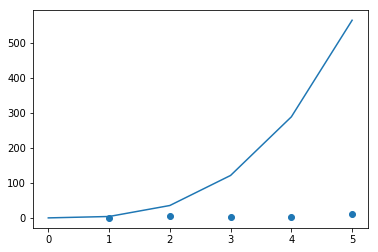

In [13]:
plt.scatter(x_data,y_data)
plt.plot(range(6),[data_min[0]+data_min[1]*i+data_min[2]*(i**2)+data_min[3]*(i**3) for i in range(6)])
plt.show()